In [1]:
import pandas as pd
# import seaborn as sns

import matplotlib.pyplot as plt
import missingno as msno

import warnings

%matplotlib inline

# warnings.filterwarnings('ignore')
# plt.style.use("ggplot")
plt.style.use("fivethirtyeight")
# plt.style.use('seaborn-darkgrid')



In [2]:
file = 'netflix_titles.csv'
df = pd.read_csv(file)
print(df.shape)
print(df.columns)
df.info()

(6234, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


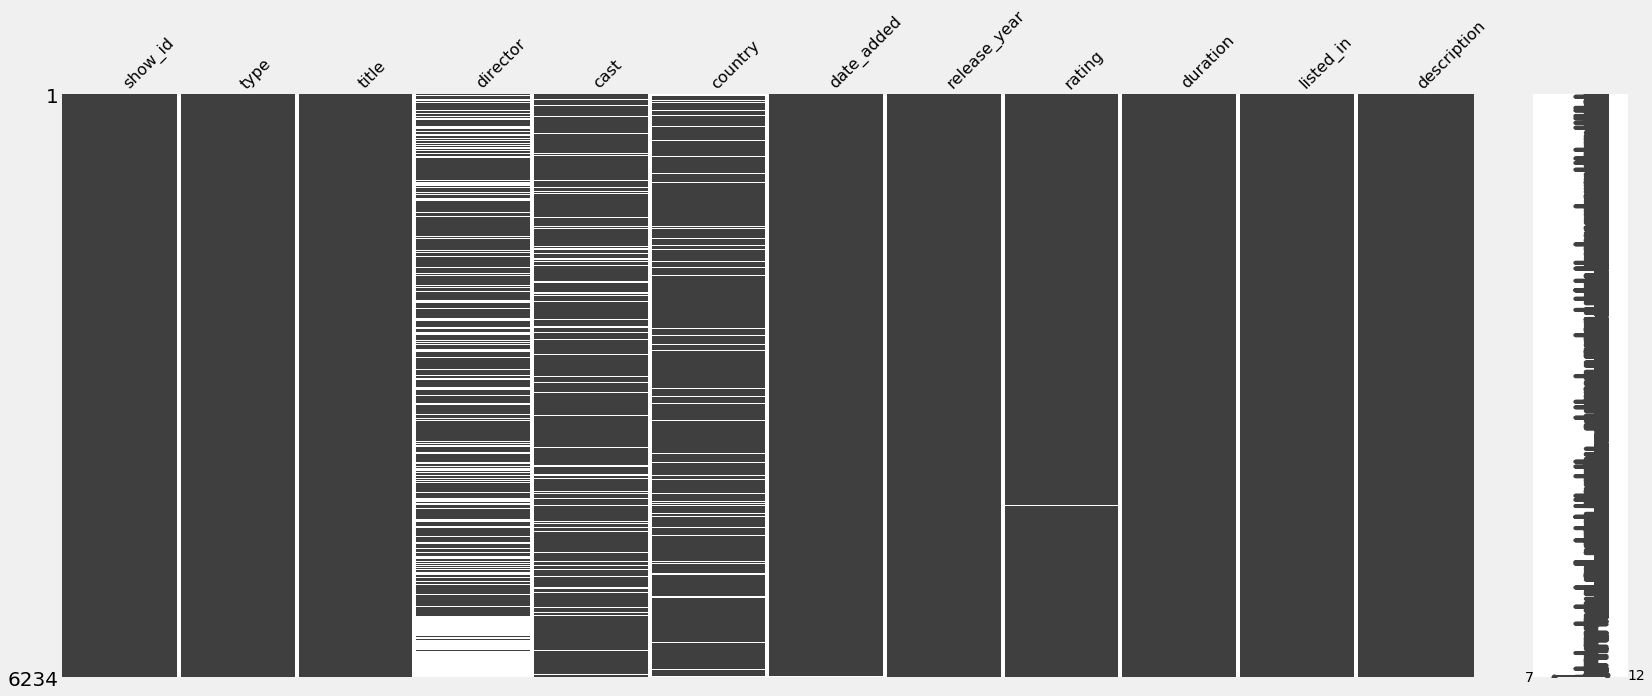

In [3]:
msno.matrix(df)

Looks like director, cast and country column has lots of missing values. Let's take a look at them statistics wise.

In [4]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate} %")

director's null rate : 31.584857234520374 %
cast's null rate : 9.143407122232915 %
country's null rate : 7.635547000320821 %
date_added's null rate : 0.17645171639396856 %
rating's null rate : 0.16041065126724416 %


### There's a total of 6234 videos available and its features are director, cast & country.

### As we can see from above `Director`, `Cast` & `Country` has lots of missing data.

In [5]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
df.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6234.0,6234,6234,4265,5664,5758,6223,6234.0,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,Tunnel,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3


In [7]:
# Some cleaning
df_c = df.fillna('NULL')
df_c['year_added'] = df_c['date_added'].apply(lambda x: x.split(',')[-1])
# We didn't want to include 2020 since the year just started not too long so it wont give a 
# a good insight of the year.
df_c['year_added'] = df_c['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
df_c['year_added'] = df_c['year_added'].apply(int)

# Distribution of Content

We would want to find out more about the contents published by Netflix, let's check out the distribution of it using a simple pie chart.

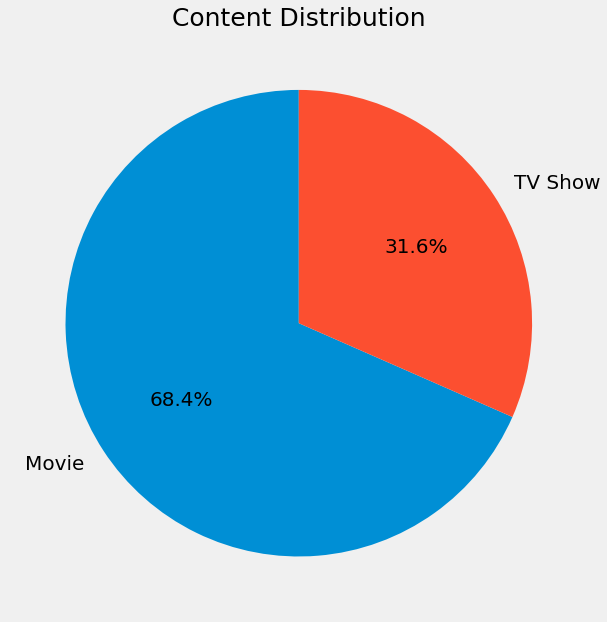

In [8]:
ax_p = df_c['type'].value_counts().plot(kind='pie',subplots=True, figsize=(10,10), startangle = 90, 
         autopct = '%1.1f%%', legend=False, fontsize=20)
plt.title('Content Distribution', fontsize=25)
plt.ylabel('')
plt.show()

### 31.6% or about 2/3 of the contents are made up of TV Shows.

# Content Growth Over The Years
###### Netflix has been pretty popular in the recent years and nobody really knows them till now. But is it true that their growth has just recently started? Let's find out by using a simple line plot to see the trends over the years.

In [9]:
# Get counts for each type of the content (Movie & TV Show)
year_data = df_c['year_added'].value_counts().sort_index().loc[:2019]
type_data = df_c.groupby('year_added')['type'].value_counts().unstack().fillna(0).loc[:2019]

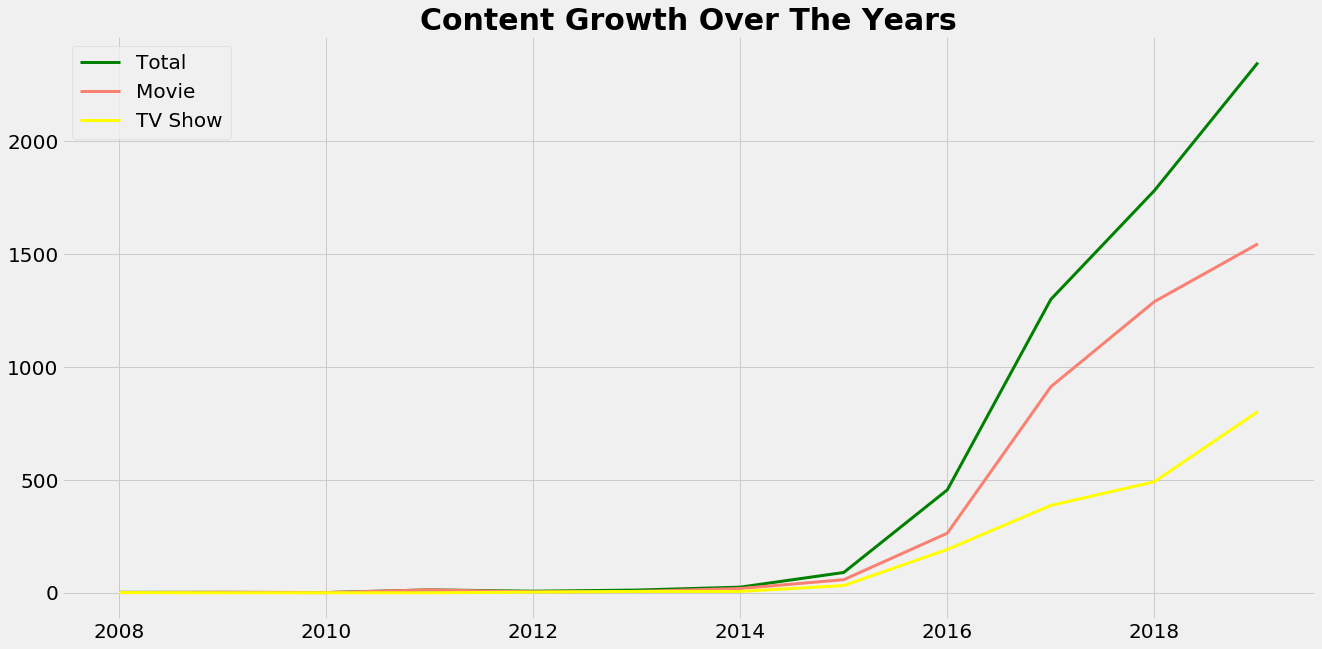

In [10]:
# Line plot to show the trend of growth over the years 
fig, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(year_data.index, year_data, color = 'green', linewidth=3, label='Total')
ax.plot(type_data.index, type_data['Movie'], color='salmon', linewidth=3, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='yellow', linewidth=3, label='TV Show')

ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.set_title('Content Growth Over The Years', fontsize=30, fontweight='bold')
plt.legend(loc='upper left', fontsize=20)


#### Netflix started back as early as 2006 but only seen some growth in 2008. However, there's a significant growth in the contents published during recent years, what could possibly drive this sudden growth? 
#### It could be that launching of streaming services in other countries definitely contributed to the exponential growth of the content.
#### Let's look at the `year_added` column that we create earlier and compare with [Netflix's Timeline here.](https://en.wikipedia.org/wiki/Timeline_of_Netflix)
#### `Next to do: Add annottion on each significant Netflix's event according to the time line. `

# Which country produces the most Contents?

In [11]:
# importing the Counter
from collections import Counter
# Split the column 'countries' and store them in countries as List
countries = ','.join(df_c['country']).replace(' ,',',').replace(', ',',').split(',')
# Take the countries List and count them with the Counter as Series
country_counting = pd.Series(dict(Counter(countries))).sort_values(ascending=False)
# Drop NULL values
country_counting.drop(['NULL'], axis=0, inplace=True)

In [13]:
# Let's see some stats 
total = sum(country_counting)
top20 = sum(country_counting[:20])

print(f'Total counts for all countries: {total}')
print(f'Top 20 Countries count: {top20}')
# Let's see if the top 20 made up the majority so we can apply Pareto 80/20 rule .
print(f'So, top 20 countries made up about {100 * top20/total}% of the total counts.')


Total counts for all countries: 7182
Top 20 Countries count: 6318
So, top 20 countries made up about 87.96992481203007% of the total counts.


#### Since the Top 20 countries made up about 88% of the whole content, let's just use the Pareto 80/20 rule and visualize the countries based on the above result.

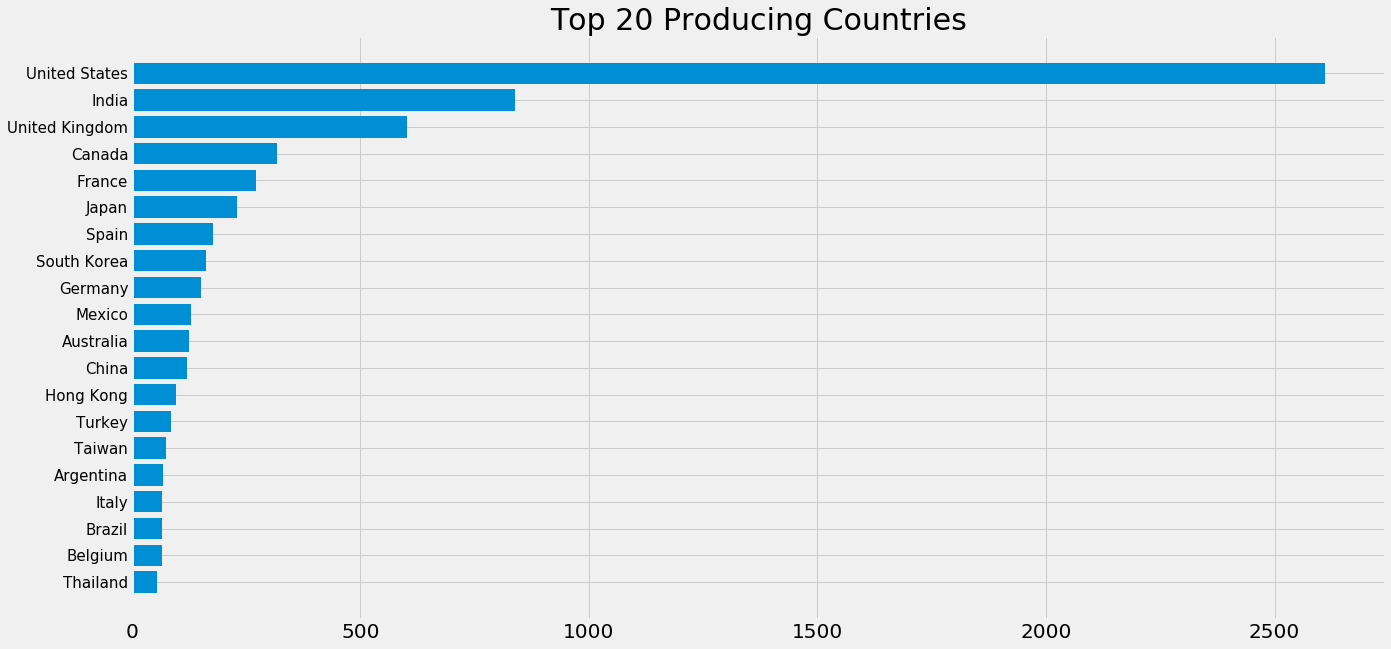

In [22]:
# Plotting the barplot to compare the top 20 countries

#Getting the top 20 countries data
top20Countries = country_counting[:20]
# plotting the bar plot
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.barh(top20Countries.index, top20Countries)
ax.set_title('Top 20 Producing Countries', fontsize=30)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=20)
ax.invert_yaxis()
# ax.grid(False)


#### Looks like the Hollywood (US) made up about 2500 of the shows, Bollywood (India) came second and barely 1/3 of Hollywood productions. 
#### Let's narrow down to Top 5 to get a better look.

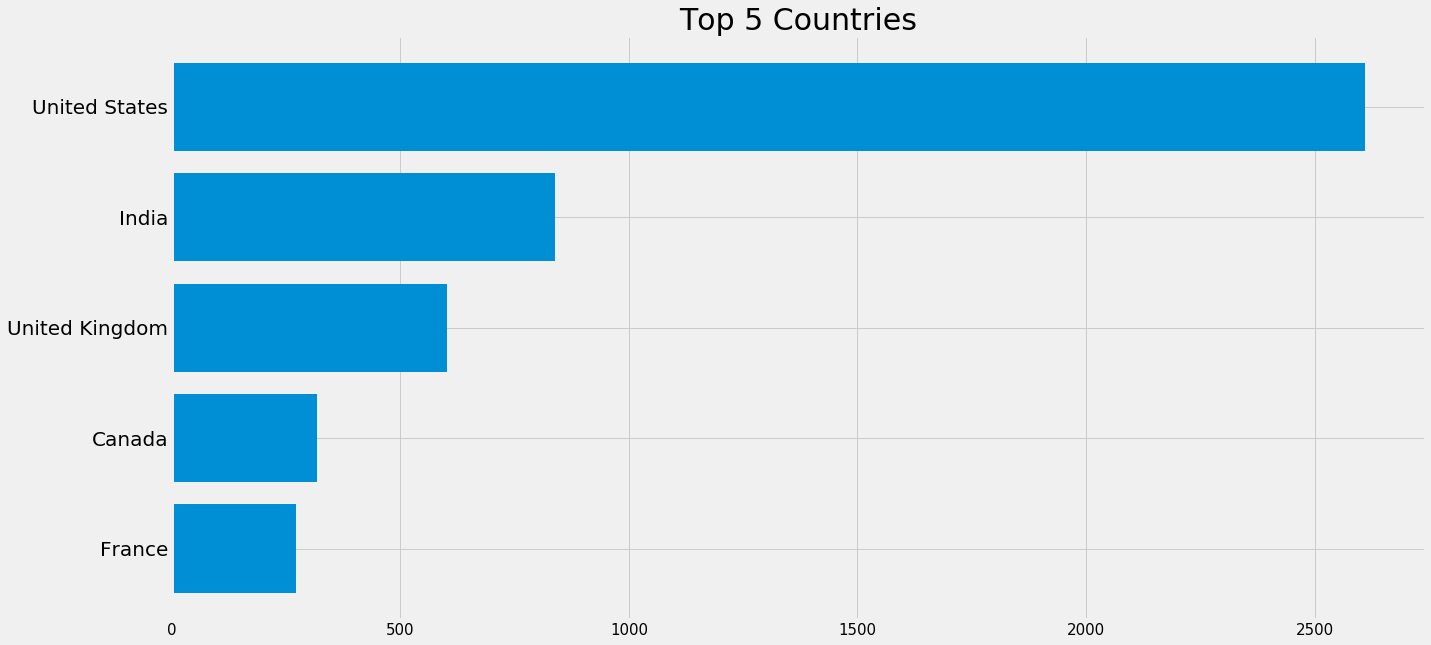

In [21]:
top5countries = country_counting[:5]

fig, ax = plt.subplots(1,1,figsize=(20,10))

ax.barh(top5countries.index, top5countries)
ax.invert_yaxis()
ax.set_title("Top 5 Countries", fontsize=30)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=15)

# Distribution of Movie Duration